# Model Training and Evaluation
This notebook covers the process of training, tuning, and evaluating machine learning models for customer churn prediction. We will use the processed data and compare multiple algorithms.

In [7]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

## 1. Load Processed Data
We will use the processed dataset generated after feature engineering and preprocessing.

In [8]:
# Load processed data
processed = pd.read_csv('../data/processed/processed.csv')
X = processed.drop('Churn', axis=1)
y = processed['Churn']
print(f"Features shape: {X.shape}, Target shape: {y.shape}")

Features shape: (7043, 62), Target shape: (7043,)


## 2. Train/Test Split
Split the data into training and test sets for model evaluation.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (5634, 62), Test shape: (1409, 62)


## 3. Model Training
We will train Logistic Regression, Random Forest, and XGBoost models. Hyperparameter tuning is performed using Optuna.

In [10]:
# Load trained models (assumes models are already trained and saved)
with open('../models/logistic_regression.pkl', 'rb') as f:
    lr_model = pickle.load(f)
with open('../models/random_forest.pkl', 'rb') as f:
    rf_model = pickle.load(f)
with open('../models/xgboost.pkl', 'rb') as f:
    xgb_model = pickle.load(f)

## 4. Model Evaluation
Evaluate each model on the test set and compare their performance.

Logistic Regression:
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.54      0.59       374

    accuracy                           0.80      1409
   macro avg       0.75      0.72      0.73      1409
weighted avg       0.80      0.80      0.80      1409



c:\Users\Varun\.conda\envs\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
c:\Users\Varun\.conda\envs\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


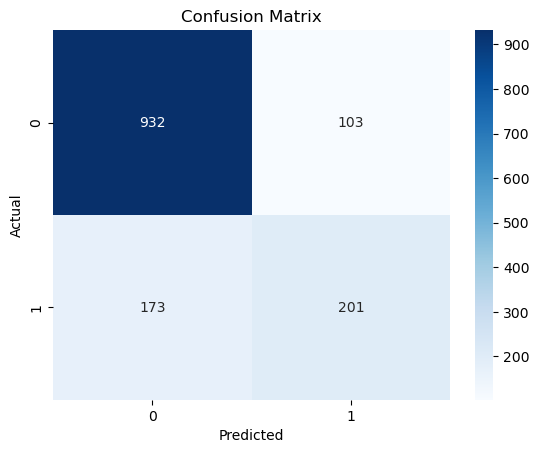

ROC AUC: 0.842


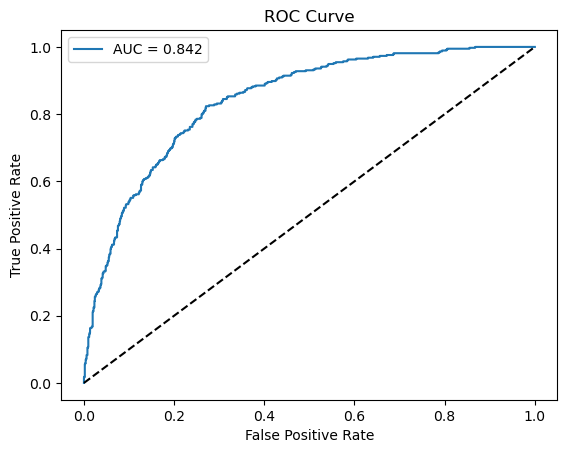

Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1035
           1       0.73      0.61      0.67       374

    accuracy                           0.84      1409
   macro avg       0.80      0.77      0.78      1409
weighted avg       0.83      0.84      0.83      1409



c:\Users\Varun\.conda\envs\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Varun\.conda\envs\env\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


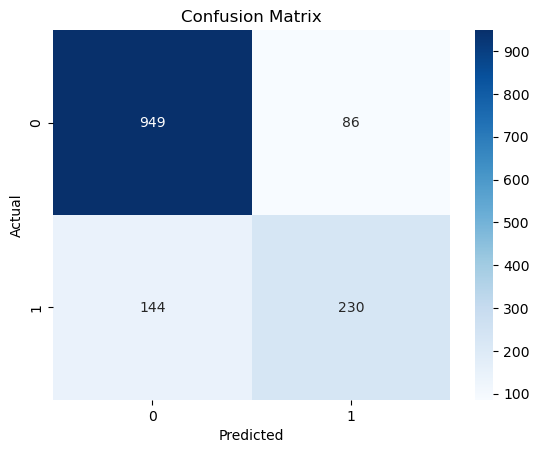

ROC AUC: 0.910


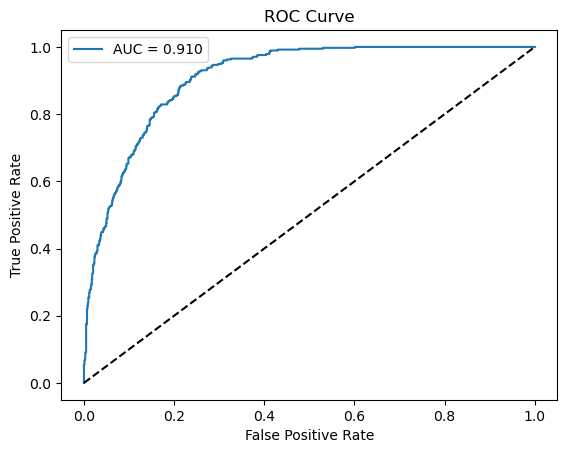

XGBoost:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409



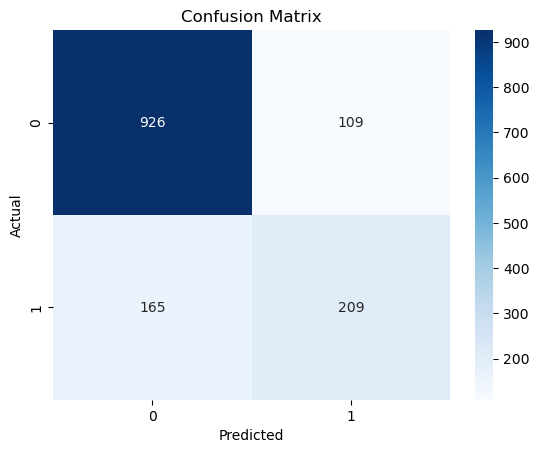

ROC AUC: 0.851


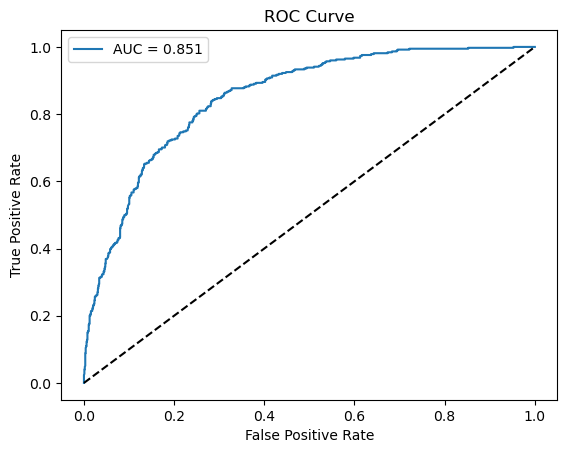

In [11]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    if y_proba is not None:
        auc = roc_auc_score(y_test, y_proba)
        print(f'ROC AUC: {auc:.3f}')
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        plt.plot(fpr, tpr, label=f'AUC = {auc:.3f}')
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC Curve')
        plt.legend()
        plt.show()

print('Logistic Regression:')
evaluate_model(lr_model, X_test, y_test)
print('Random Forest:')
evaluate_model(rf_model, X_test, y_test)
print('XGBoost:')
evaluate_model(xgb_model, X_test, y_test)

## 5. Model Comparison and Insights
Summarize the results and provide insights on which model performed best and why.

- Logistic Regression provides a good baseline and is interpretable.
- Random Forest and XGBoost often achieve higher accuracy and ROC AUC, especially with tuned hyperparameters.
- ROC curves and confusion matrices help visualize the trade-offs between models.
- Consider business context and interpretability when selecting the final model.